# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | berbera
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | islamkot
Processing Record 6 of Set 1 | paros
Processing Record 7 of Set 1 | camayenne
Processing Record 8 of Set 1 | kalymnos
Processing Record 9 of Set 1 | saipan
Processing Record 10 of Set 1 | suda
Processing Record 11 of Set 1 | malaga
Processing Record 12 of Set 1 | alpena
Processing Record 13 of Set 1 | carolina beach
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | rhinelander
Processing Record 16 of Set 1 | al bardiyah
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | bratsk
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | lupane
Processing Record 21 of Set 1 | ouddorp
Processing Record 22 of Set 1 | quellon
Processing Record 23 of Set 1 | puerto natales
Pro

Processing Record 40 of Set 4 | kourou
Processing Record 41 of Set 4 | howard springs
Processing Record 42 of Set 4 | puerto ayora
Processing Record 43 of Set 4 | el calafate
Processing Record 44 of Set 4 | facatativa
Processing Record 45 of Set 4 | colonia
Processing Record 46 of Set 4 | guercif
Processing Record 47 of Set 4 | tolanaro
Processing Record 48 of Set 4 | ciudad bolivar
Processing Record 49 of Set 4 | hassi messaoud
Processing Record 0 of Set 5 | cill airne
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | ust-tsilma
Processing Record 3 of Set 5 | dondo
Processing Record 4 of Set 5 | pradopolis
Processing Record 5 of Set 5 | selfoss
Processing Record 6 of Set 5 | van
Processing Record 7 of Set 5 | laguna
Processing Record 8 of Set 5 | magadan
Processing Record 9 of Set 5 | san carlos de bariloche
Processing Record 10 of Set 5 | punta arenas
Processing Record 11 of Set 5 | orange city
Processing Record 12 of Set 5 | malayer
Processing Record 13 of Set

Processing Record 32 of Set 8 | gornopravdinsk
Processing Record 33 of Set 8 | puerto baquerizo moreno
Processing Record 34 of Set 8 | hamilton
Processing Record 35 of Set 8 | thunder bay
Processing Record 36 of Set 8 | zhicheng
Processing Record 37 of Set 8 | chinhoyi
Processing Record 38 of Set 8 | bayanhongor
Processing Record 39 of Set 8 | kodiak
Processing Record 40 of Set 8 | sai buri
Processing Record 41 of Set 8 | olinda
Processing Record 42 of Set 8 | umm qasr
Processing Record 43 of Set 8 | choibalsan
Processing Record 44 of Set 8 | costa calma
City not found. Skipping...
Processing Record 45 of Set 8 | fort st. john
Processing Record 46 of Set 8 | akjoujt
Processing Record 47 of Set 8 | seogwipo
City not found. Skipping...
Processing Record 48 of Set 8 | 'ain benian
Processing Record 49 of Set 8 | yuzhno-kurilsk
Processing Record 0 of Set 9 | rio grande
Processing Record 1 of Set 9 | lianjiang
Processing Record 2 of Set 9 | aleksandrovsk-sakhalinskiy
Processing Record 3 of S

Processing Record 22 of Set 12 | vyksa
Processing Record 23 of Set 12 | diego de almagro
Processing Record 24 of Set 12 | saint-philippe
Processing Record 25 of Set 12 | sargatskoye
Processing Record 26 of Set 12 | mata-utu
Processing Record 27 of Set 12 | brookings
Processing Record 28 of Set 12 | padangsidempuan
Processing Record 29 of Set 12 | meybod
Processing Record 30 of Set 12 | hobyo
Processing Record 31 of Set 12 | antalaha
Processing Record 32 of Set 12 | floro
Processing Record 33 of Set 12 | akbarpur
Processing Record 34 of Set 12 | bikenibeu village
Processing Record 35 of Set 12 | hawera
Processing Record 36 of Set 12 | salalah
Processing Record 37 of Set 12 | skhira
Processing Record 38 of Set 12 | dryden
Processing Record 39 of Set 12 | watampone
Processing Record 40 of Set 12 | nabire
Processing Record 41 of Set 12 | safaga
Processing Record 42 of Set 12 | sal rei
Processing Record 43 of Set 12 | glubokoye
Processing Record 44 of Set 12 | belo sur tsiribihina
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,berbera,10.4396,45.0143,29.61,71,1,2.31,SO,1697479411
1,waitangi,-43.9535,-176.5597,12.68,90,75,3.58,NZ,1697479412
2,ushuaia,-54.8000,-68.3000,8.81,54,75,4.63,AR,1697479323
3,isafjordur,66.0755,-23.1240,3.02,75,20,5.66,IS,1697479413
4,islamkot,24.6997,70.1770,26.94,67,0,4.80,PK,1697479378


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,berbera,10.4396,45.0143,29.61,71,1,2.31,SO,1697479411
1,waitangi,-43.9535,-176.5597,12.68,90,75,3.58,NZ,1697479412
2,ushuaia,-54.8000,-68.3000,8.81,54,75,4.63,AR,1697479323
3,isafjordur,66.0755,-23.1240,3.02,75,20,5.66,IS,1697479413
4,islamkot,24.6997,70.1770,26.94,67,0,4.80,PK,1697479378


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

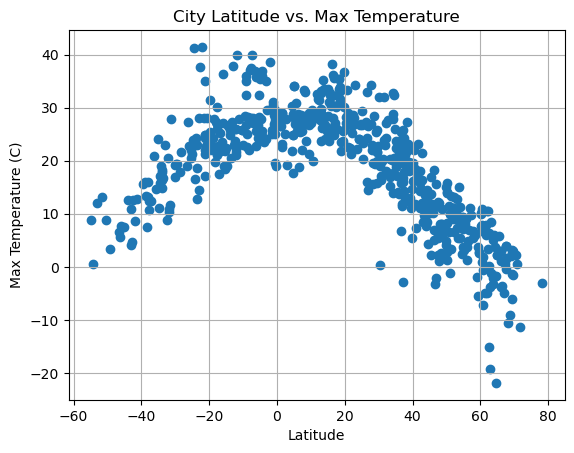

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

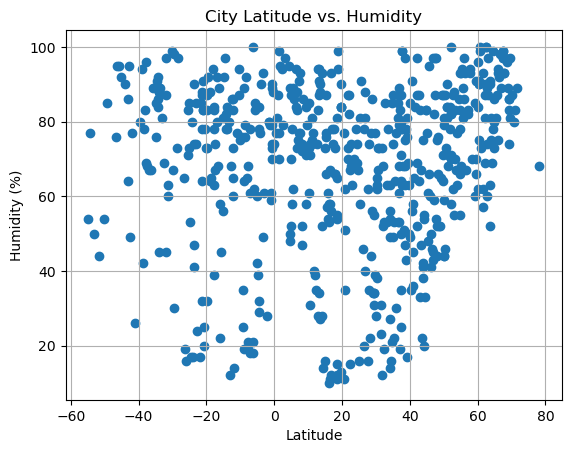

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

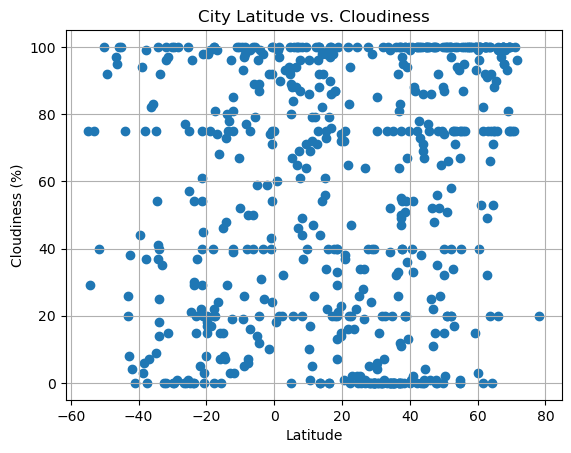

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

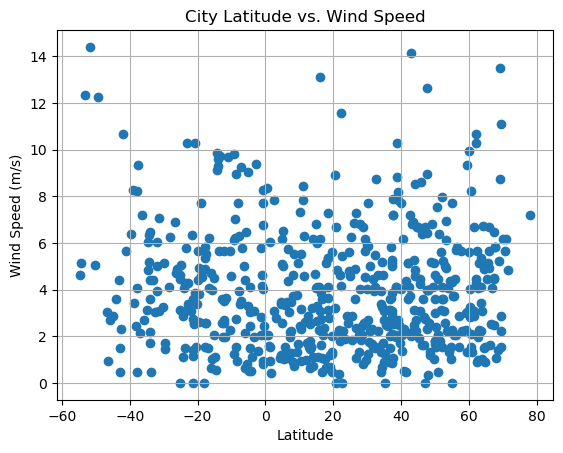

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,berbera,10.4396,45.0143,29.61,71,1,2.31,SO,1697479411
3,isafjordur,66.0755,-23.1240,3.02,75,20,5.66,IS,1697479413
4,islamkot,24.6997,70.1770,26.94,67,0,4.80,PK,1697479378
5,paros,37.0833,25.1500,22.39,80,12,5.82,GR,1697479413
6,camayenne,9.5350,-13.6878,29.05,79,40,5.14,GN,1697479414


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,12.68,90,75,3.58,NZ,1697479412
2,ushuaia,-54.8000,-68.3000,8.81,54,75,4.63,AR,1697479323
13,adamstown,-25.0660,-130.1015,21.23,85,57,4.44,PN,1697479309
16,papatowai,-46.5619,169.4708,6.65,76,97,3.03,NZ,1697479416
18,carnarvon,-24.8667,113.6333,23.92,53,0,5.04,AU,1697479416


###  Temperature vs. Latitude Linear Regression Plot

r-value is -0.8644996016329274


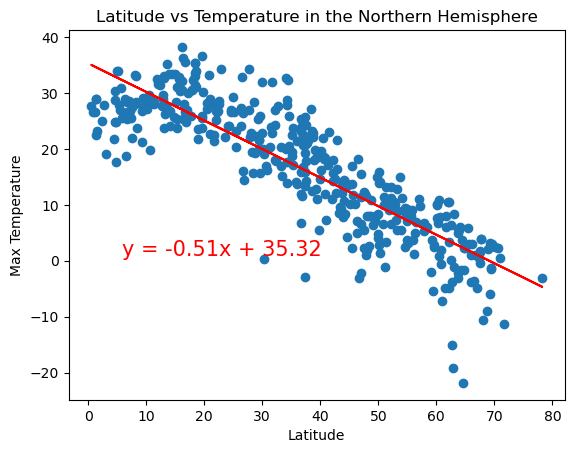

In [39]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs Temperature in the Northern Hemisphere")
print(f"r-value is {rvalue}")
plt.show()

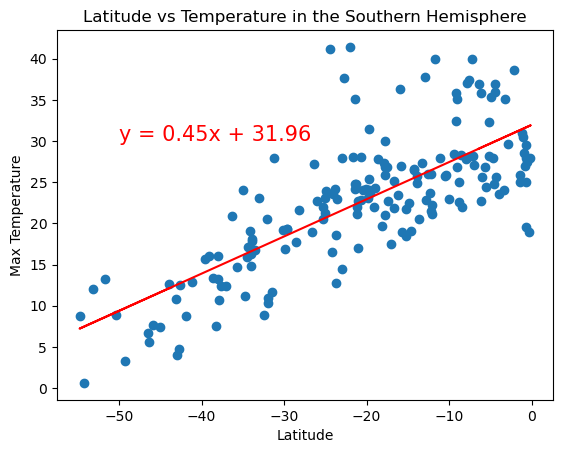

y = 0.45x + 31.96


In [30]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs Temperature in the Southern Hemisphere")
print(f"r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
There is a strong correlation between latitude and maximum temperature in both the Northern and Southern hemispheres. As latitude approaches 0 degrees, the maximum temperature increases. In the Northern hemisphere this results in a negative regression line as latitude starts at 0 degrees and increases in the representation above. In the Southern hemisphere this results in a positive regression line as the graph begins at approximately -60 degrees and increases to 0 degrees.

### Humidity vs. Latitude Linear Regression Plot

r-value is 0.22784990604173802


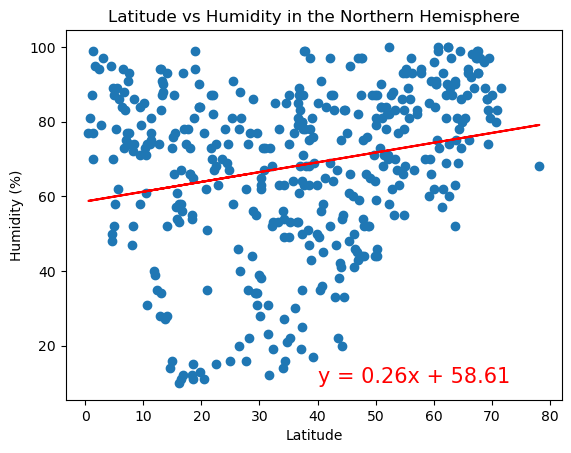

In [40]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity in the Northern Hemisphere")
print(f"r-value is {rvalue}")
plt.show()

r-value is -0.11691704811574694


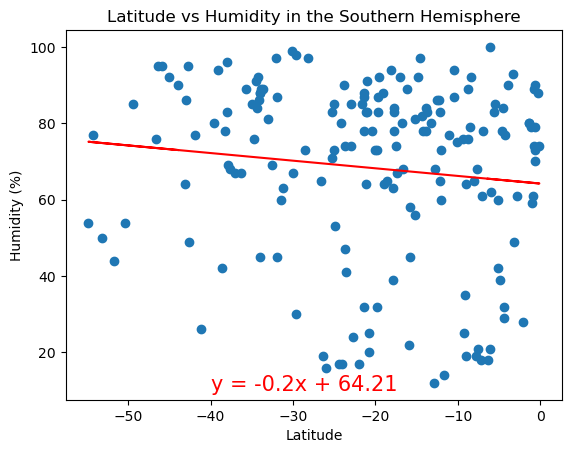

In [41]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity in the Southern Hemisphere")
print(f"r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
There is not a strong relationship between humidity and latitude based on the r-value being far from one. However, based on the regression models there appears to be a slighlty positive relationship between latitude and humidity in the Northern hemisphere and a slightly negative relationship between latitude and humidity in the Southern hemisphere. This indicates that as you move towards the poles and away from the equator there may be an increase in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

r-value is 0.17799114170694863


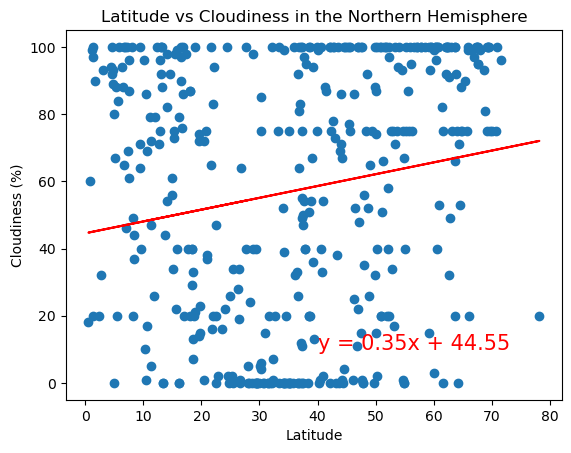

In [42]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness in the Northern Hemisphere")
print(f"r-value is {rvalue}")
plt.show()

r-value is 0.08458285824522102


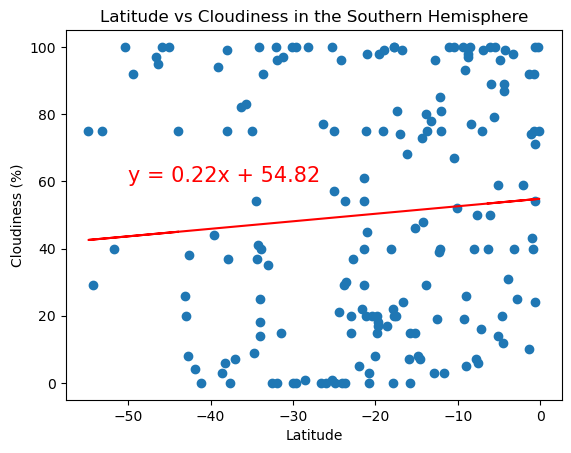

In [38]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness in the Southern Hemisphere")
print(f"r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
There is not a strong relationship between latitude and cloudiness in neither the Northern nor Southern hemisphere based on the r-value being far from 1. This is also visually represented in the data which appears as noise with little to no pattern emerging.

### Wind Speed vs. Latitude Linear Regression Plot

r-value is 0.15499978859050748


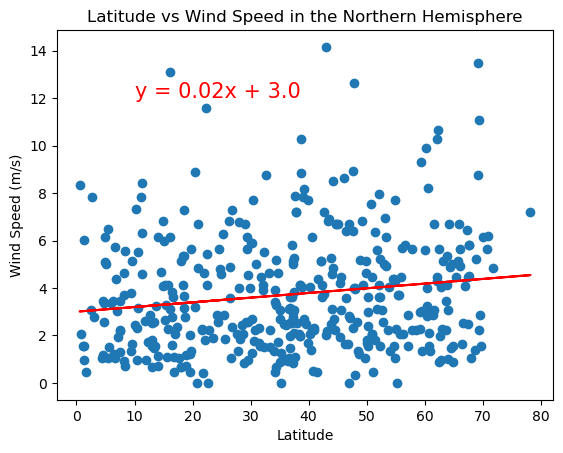

In [43]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs Wind Speed in the Northern Hemisphere")
print(f"r-value is {rvalue}")
plt.show()

r-value is -0.1271797816632979


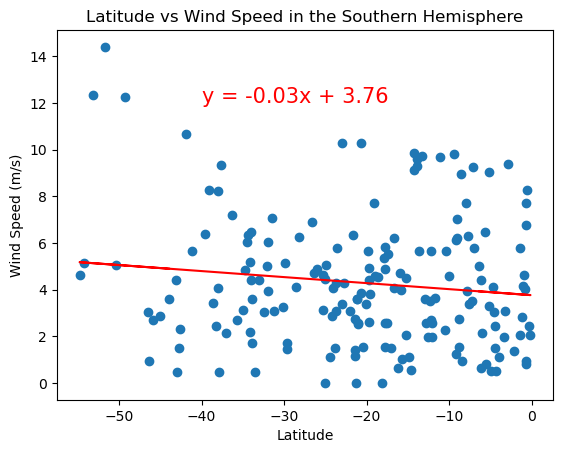

In [45]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs Wind Speed in the Southern Hemisphere")
print(f"r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
There is not a strong relationship between latitude and wind speed in neither the Northern nor the Southern hemisphere. The regression models visually appear as condensed noise, that may have some outliers that represent high speed winds. These potential outliers appear to occur further from the equator and result in a slightly positive relationship in the Northern hemisphere and a slightly negative relationship in the Southern hemisphere.